<a href="https://colab.research.google.com/github/nflorezasu/MAT-421/blob/main/MAT421_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io


#load the data 
from google.colab import files #Only use for Google Colab
uploaded = files.upload()      #Only use for Google Colab


Saving sportsref_download.csv to sportsref_download (1).csv


In [ ]:
#Read in the data
nba = pd.read_csv('sportsref_download.csv')
nba.head(10) 

,Rk,Player,Pos,Age,Tm,G,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,PTS
0,1,Joel Embiid,C,27,PHI,68,0.499,0.371,0.814,2.1,9.6,11.7,4.2,1.1,1.5,30.6
1,2,Giannis Antetokounmpo,PF,27,MIL,67,0.553,0.293,0.722,2.0,9.6,11.6,5.8,1.1,1.4,29.9
2,3,Luka Dončić,PG,22,DAL,65,0.457,0.353,0.744,0.9,8.3,9.1,8.7,1.2,0.6,28.4
3,4,Trae Young,PG,23,ATL,76,0.460,0.382,0.904,0.7,3.1,3.7,9.7,0.9,0.1,28.4
4,5,DeMar DeRozan,PF,32,CHI,76,0.504,0.352,0.877,0.7,4.4,5.2,4.9,0.9,0.3,27.9
5,6,Nikola Jokić,C,26,DEN,74,0.583,0.337,0.810,2.8,11.0,13.8,7.9,1.5,0.9,27.1
6,7,Jayson Tatum,SF,23,BOS,76,0.453,0.353,0.853,1.1,6.9,8.0,4.4,1.0,0.6,26.9
7,8,Devin Booker,SG,25,PHO,68,0.466,0.383,0.868,0.7,4.4,5.0,4.8,1.1,0.4,26.8
8,9,Donovan Mitchell,SG,25,UTA,67,0.448,0.355,0.853,0.8,3.4,4.2,5.3,1.5,0.2,25.9
9,10,Stephen Curry,PG,33,GSW,64,0.437,0.380,0.923,0.5,4.7,5.2,6.3,1.3,0.4,25.5


In [ ]:
#Get the number of rows and columns 
nba.shape

(228, 16)

In [ ]:
nba.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Rk     114.500000
Age     25.969298
G       69.390351
FG%      0.469263
3P%      0.340822
FT%      0.775316
ORB      1.046930
DRB      3.696930
TRB      4.746930
AST      2.765351
STL      0.826316
BLK      0.490351
PTS     12.188596
dtype: float64

In [ ]:
nba.loc[:,"FG%"].mean()

0.46926315789473666

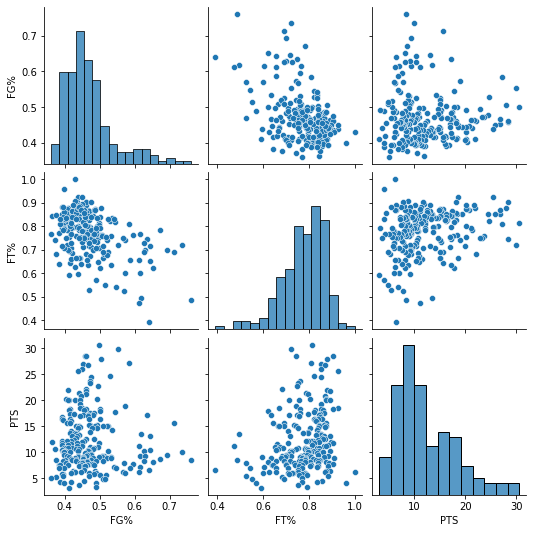

In [ ]:
sns.pairplot(nba[["FG%", "FT%", "PTS"]])
plt.show()

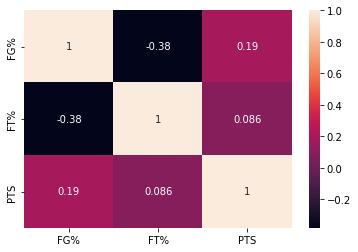

In [ ]:
correlation = nba[["FG%", "FT%", "PTS"]].corr()
sns.heatmap(correlation, annot=True)

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = nba._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

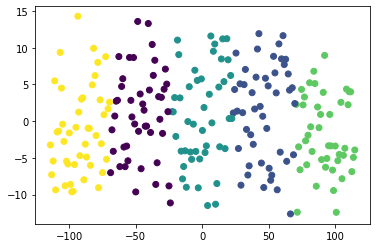

In [ ]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/MAT421_Final_Project.ipynb

[NbConvertApp] Converting notebook /content/MAT421_Final_Project.ipynb to html
[NbConvertApp] Writing 430454 bytes to /content/MAT421_Final_Project.html


In [44]:
# Find player LeBron
LeBron = good_columns.loc[ nba['Player'] == 'LeBron James',: ]

#Find player Durant
Durant = good_columns.loc[ nba['Player'] == 'Kevin Durant',: ]

In [45]:
print(LeBron)
print(Durant)

Empty DataFrame
Columns: [Rk, Age, G, FG%, FT%, ORB, DRB, TRB, AST, STL, BLK, PTS]
Index: []
Empty DataFrame
Columns: [Rk, Age, G, FG%, FT%, ORB, DRB, TRB, AST, STL, BLK, PTS]
Index: []
